In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!apt-get update
!apt-get install tesseract-ocr -y

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,853 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [5,103 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,773 kB]
Get:13 http://security.ubuntu.

In [6]:
!pip install pytesseract

In [7]:
import os
import pytesseract
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [8]:
!git clone https://github.com/pjreddie/darknet.git /content/darknet

Cloning into '/content/darknet'...
remote: Enumerating objects: 5955, done.
remote: Total 5955 (delta 0), reused 0 (delta 0), pack-reused 5955 (from 1)
Receiving objects: 100% (5955/5955), 6.37 MiB | 14.83 MiB/s, done.
Resolving deltas: 100% (3931/3931), done.


In [9]:
%cd /content/darknet

/content/darknet


In [10]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

In [11]:
with open('/content/darknet/obj.names', 'w') as f:
    f.write("Test Name")


In [12]:
project_path = '/content/drive/MyDrive/Project_10_OCR_Project'


In [13]:
os.chdir(project_path)


In [14]:
!ls


coco.names   OCR_Preprocessing.ipynb  YOLO_Training.ipynb  yolov3.weights
Dataset_OCR  results		      yolov3.cfg


In [15]:
!sudo apt install tesseract-ocr -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.


In [16]:

!pip install pytesseract opencv-python


In [17]:
#  Define project and folder paths inside your Drive
project_path = '/content/drive/MyDrive/Project_10_OCR_Project'
dataset_path = os.path.join(project_path, 'Dataset_OCR')
models_path = os.path.join(project_path, 'models')
results_path = os.path.join(project_path, 'results')


In [18]:
#  Check if dataset folder exists
print(os.path.exists(dataset_path))


True


In [19]:
#  Just confirming path value
dataset_path


'/content/drive/MyDrive/Project_10_OCR_Project/Dataset_OCR'

In [20]:
#  Step 1: Define the path to a test image
image_path = os.path.join(dataset_path, '/content/drive/MyDrive/Project_10_OCR_Project/Dataset_OCR/thyrocare_0_421.jpg')


In [21]:
#  Step 2: Show the resolved image path
image_path


'/content/drive/MyDrive/Project_10_OCR_Project/Dataset_OCR/thyrocare_0_421.jpg'

In [22]:
#  Step 3: Check if the image exists
print(os.path.exists(image_path))  # Should return True


True


In [23]:
# Example YOLO output (normalized): x_center, y_center, width, height
x_center, y_center, width, height = 0.5, 0.5, 0.2, 0.2

# Assuming image size is 500x500 (change if needed)
image_width = 500
image_height = 500

# Convert to pixel values
x = int((x_center - width / 2) * image_width)
y = int((y_center - height / 2) * image_height)
w = int(width * image_width)
h = int(height * image_height)
img = cv2.imread(image_path)



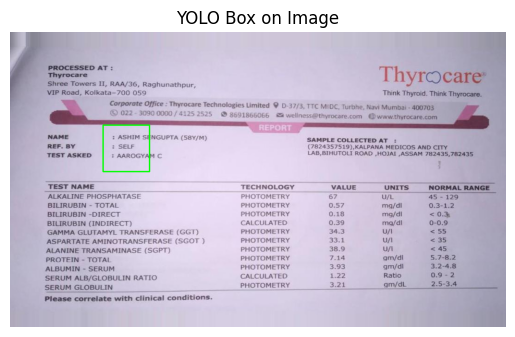

In [24]:
# Draw rectangle on image
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert BGR to RGB for display in matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(img_rgb)
plt.title("YOLO Box on Image")
plt.axis("off")
plt.show()


In [25]:
!ls /content/drive/MyDrive/Project_10_OCR_Project/Dataset_OCR

thyrocare_0_122.jpg  thyrocare_0_421.jpg  thyrocare_0_517.jpg
thyrocare_0_123.jpg  thyrocare_0_447.jpg  thyrocare_0_757.jpg
thyrocare_0_36.jpg   thyrocare_0_511.jpg


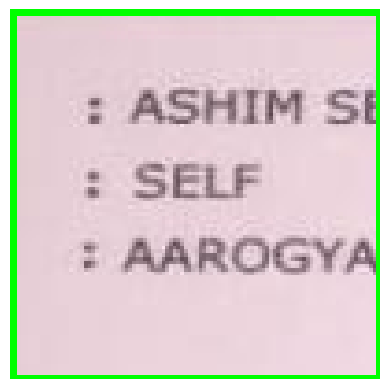

In [26]:
crop = img[y:y+h, x:x+w]
plt.imshow(crop)
plt.axis("off")
plt.show()

In [27]:
# preproceses (resizes,grayscale,blur,threshold)
crop_resized = cv2.resize(crop, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  1, 255,   1],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  1, 255,   1]],

       [[  0, 255,   0],
        [  1, 255,   1],
        [  2, 254,   2],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  3, 254,   2]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [144, 232, 136],
        [ 42, 248,  40],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 42, 248,  40],
        [ 12, 253,  12],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  1, 255,   1],
        [  3, 254,   2],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  3, 255,   3]]], dtype=uint8)
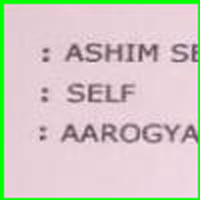

In [28]:
crop_resized

classIds: [np.int64(63), np.int64(63), np.int64(63)]
confidences: [0.3897519111633301, 0.39995077252388, 0.5319564938545227]
boxes: [[1, -51, 639, 1103], [20, 40, 584, 1040], [5, 31, 629, 1051]]


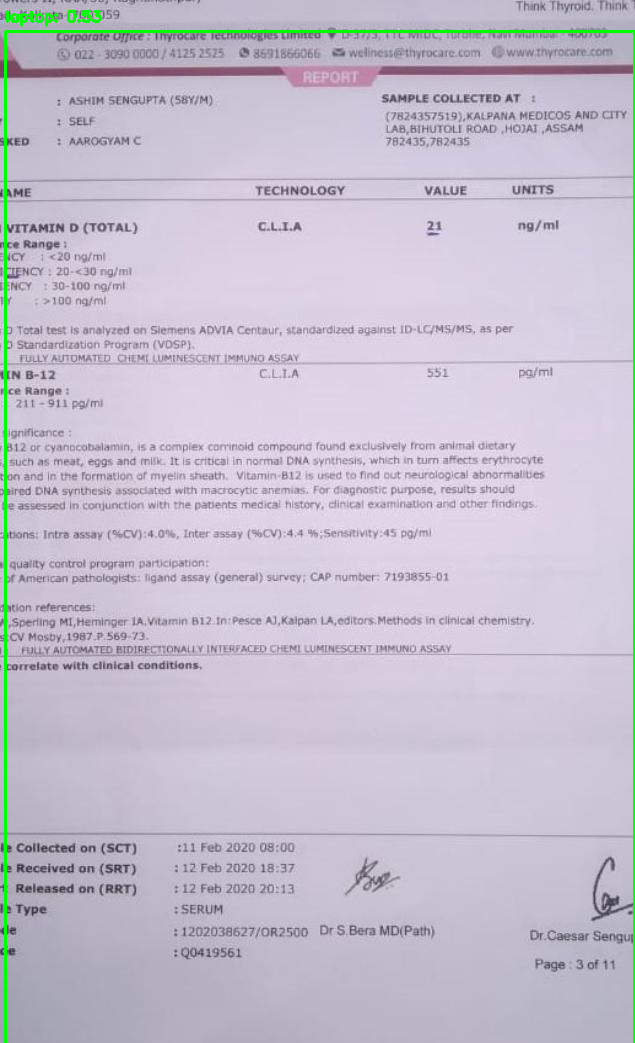

In [29]:
import cv2
import numpy as np

net = cv2.dnn.readNetFromDarknet('/content/drive/MyDrive/Project_10_OCR_Project/yolov3.cfg', '/content/drive/MyDrive/Project_10_OCR_Project/yolov3.weights')
layer_names = net.getLayerNames()
unconnected_out_layers = net.getUnconnectedOutLayers()
if len(unconnected_out_layers.shape) == 2:
    output_layers = [layer_names[i[0] - 1] for i in unconnected_out_layers]
else:
    output_layers = [layer_names[i - 1] for i in unconnected_out_layers]

with open('/content/drive/MyDrive/Project_10_OCR_Project/coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]
# Load image
image = cv2.imread('/content/drive/MyDrive/Project_10_OCR_Project/Dataset_OCR/thyrocare_0_36.jpg')
height, width = image.shape[:2]
# Prepare input blob
blob = cv2.dnn.blobFromImage(image, 1/255.0, (320, 320), swapRB=True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)
# Parse detections
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.3:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Non-max suppression to remove overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.3, 0.4)

for i in indices.flatten():
    x, y, w, h = boxes[i]
    label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

print('classIds:', class_ids)
print('confidences:', confidences)
print('boxes:', boxes)

# For Colab, use cv2_imshow; otherwise, use cv2.imshow
from google.colab.patches import cv2_imshow
cv2_imshow(image)


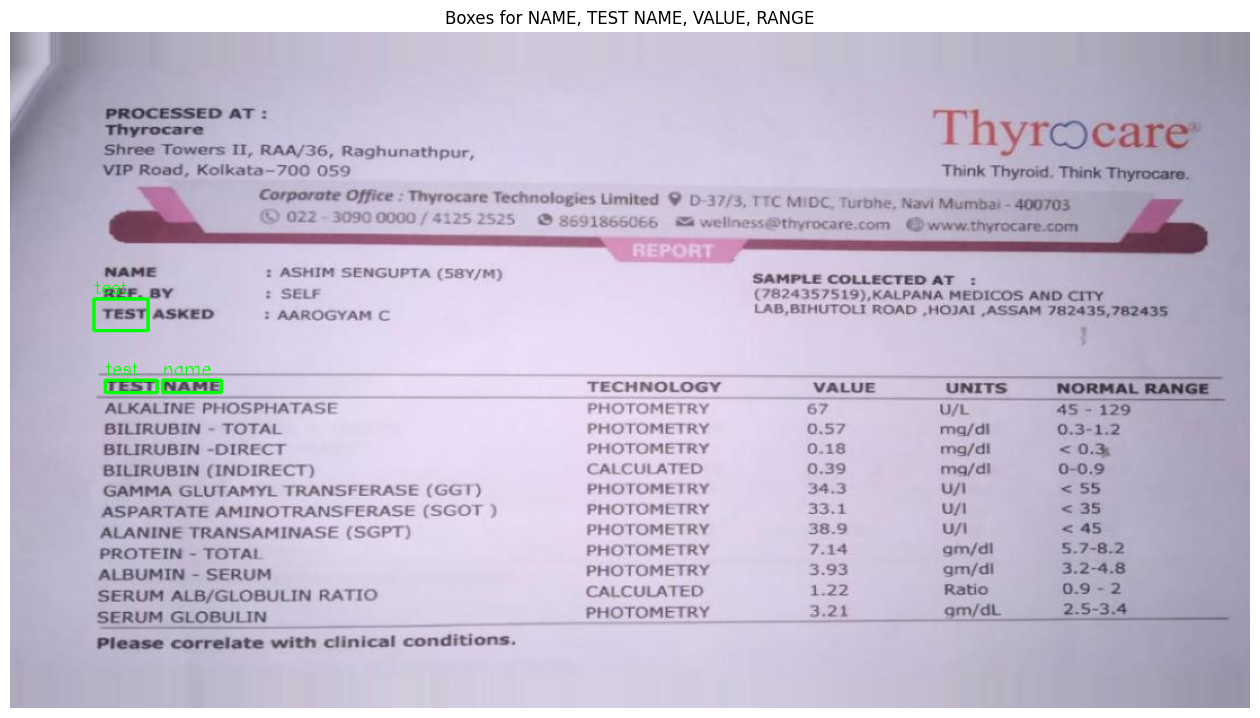

In [30]:
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

# Load image
image_path = '/content/drive/MyDrive/Project_10_OCR_Project/Dataset_OCR/thyrocare_0_421.jpg'
image = cv2.imread(image_path)

# Resize for clarity
image = cv2.resize(image, (1100, 600))

# Convert to RGB
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run OCR
results = pytesseract.image_to_data(rgb, output_type=Output.DICT)

# Define keywords for categories of interest
target_keywords = ['name', 'test', 'value', 'range']

# Loop and draw bounding boxes
for i in range(len(results['text'])):
    word = results['text'][i].strip().lower()
    if any(key in word for key in target_keywords) and int(results['conf'][i]) > 40:
        x, y, w, h = results['left'][i], results['top'][i], results['width'][i], results['height'][i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, word, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Display the result
plt.figure(figsize=(16, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Boxes for NAME, TEST NAME, VALUE, RANGE")
plt.axis("off")
plt.show()


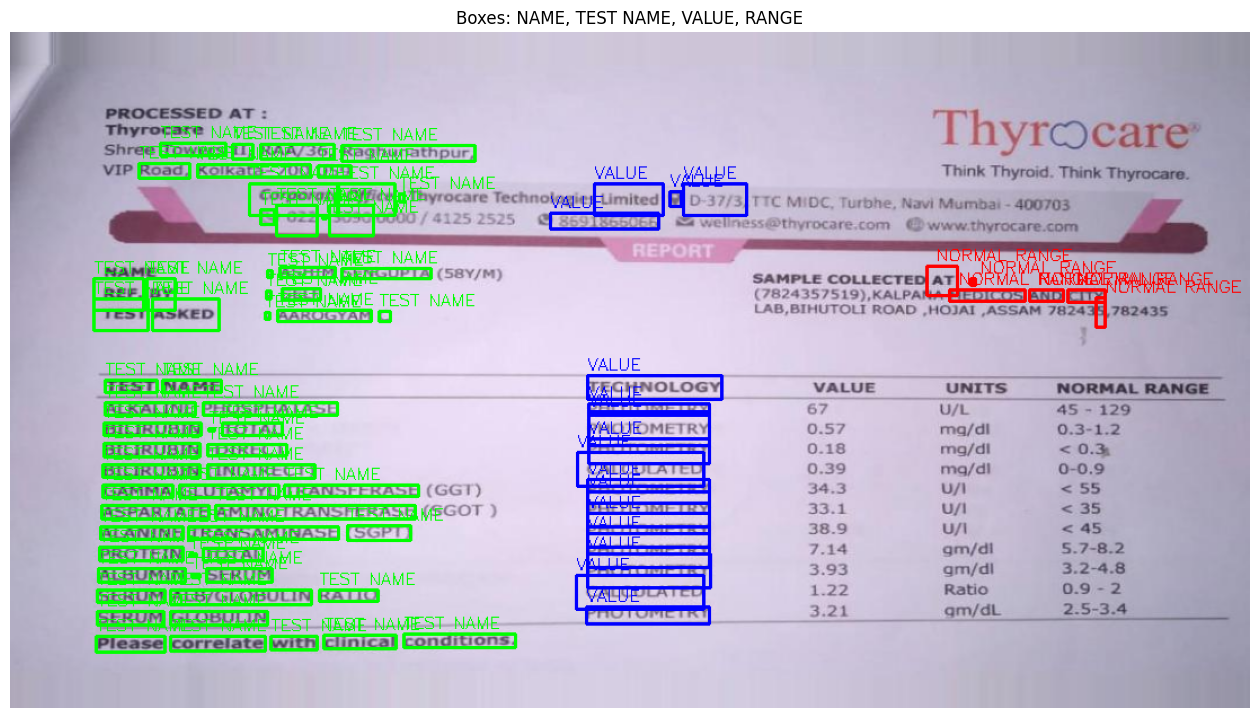

In [31]:
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

# Load image
image_path = '/content/drive/MyDrive/Project_10_OCR_Project/Dataset_OCR/thyrocare_0_421.jpg'
image = cv2.imread(image_path)

# Resize image
image = cv2.resize(image, (1100, 600))

# Convert to RGB
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get OCR output
results = pytesseract.image_to_data(rgb, output_type=Output.DICT)

# Define column position boundaries for different zones
for i in range(len(results['text'])):
    text = results['text'][i].strip()
    if text == "" or int(results['conf'][i]) < 40:
        continue

    x, y, w, h = results['left'][i], results['top'][i], results['width'][i], results['height'][i]

    # Detect by column location (approximate):
    if x < 350:  # Test name column
        color = (0, 255, 0)
        label = "TEST NAME"
    elif 450 < x < 600:  # Value column
        color = (255, 0, 0)
        label = "VALUE"
    elif x > 800:  # Range column
        color = (0, 0, 255)
        label = " NORMAL RANGE"
    elif 'name' in text.lower():  # Only 'name'
        color = (255, 255, 0)
        label = "NAME"
    else:
        continue

    # Draw box and label
    cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
    cv2.putText(image, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

# Display result
plt.figure(figsize=(16, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Boxes: NAME, TEST NAME, VALUE, RANGE")
plt.axis("off")
plt.show()


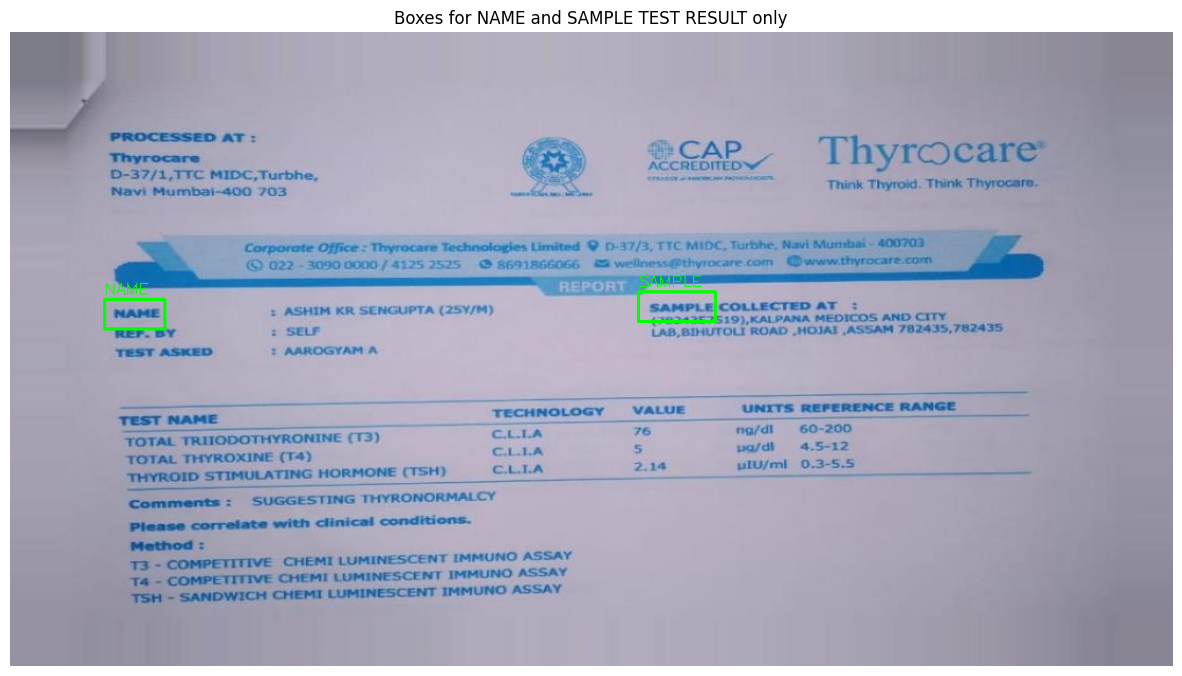

In [32]:
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Project_10_OCR_Project/Dataset_OCR/thyrocare_0_447.jpg'
image = cv2.imread(image_path)

# Resize (optional)
image = cv2.resize(image, (1100, 600))

# Convert to RGB for Tesseract
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run OCR with bounding box output
results = pytesseract.image_to_data(rgb, output_type=Output.DICT)

# Keywords to find
target_keywords = ['name', 'sample', 'test', 'result']

# Draw boxes for relevant keywords
for i in range(len(results['text'])):
    word = results['text'][i].strip().lower()
    if any(key in word for key in target_keywords) and int(results['conf'][i]) > 50:
        x, y, w, h = results['left'][i], results['top'][i], results['width'][i], results['height'][i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, results['text'][i], (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Show the result
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Boxes for NAME and SAMPLE TEST RESULT only")
plt.axis("off")
plt.show()


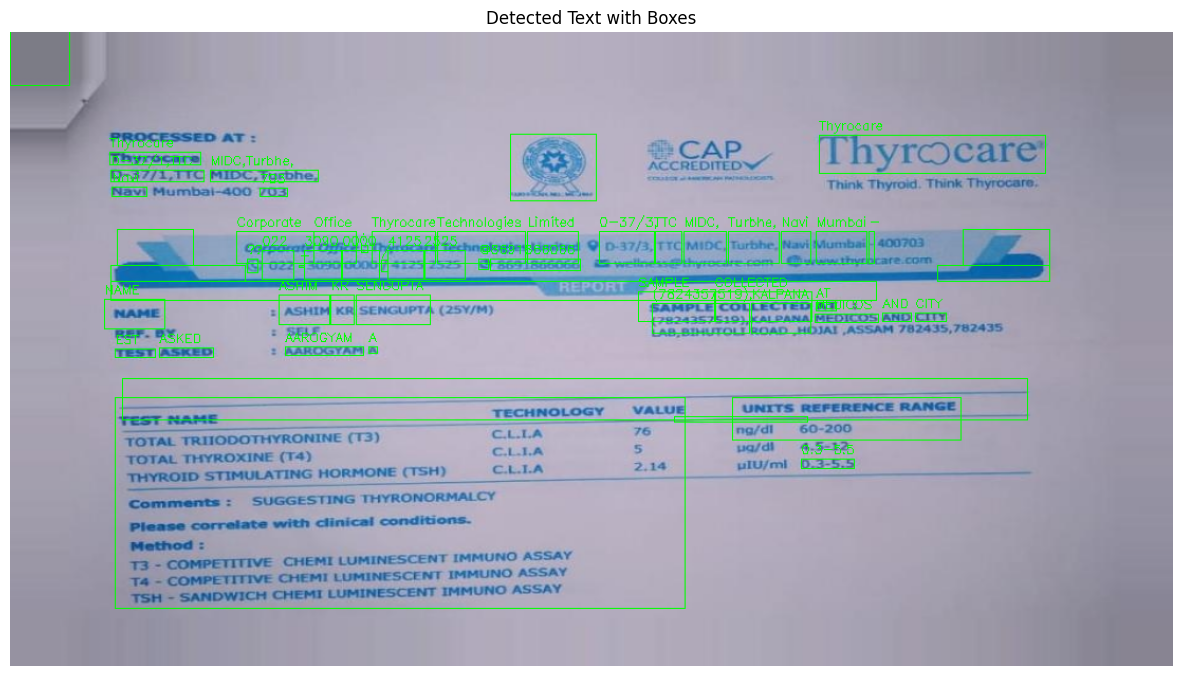

In [33]:
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

# Load your image
image_path = '/content/drive/MyDrive/Project_10_OCR_Project/Dataset_OCR/thyrocare_0_447.jpg'
image = cv2.imread(image_path)

# Resize image if needed
image = cv2.resize(image, (1100, 600))  # Resize for better viewing

# Convert to RGB (pytesseract needs RGB)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Run Tesseract OCR on the image
results = pytesseract.image_to_data(rgb, output_type=Output.DICT)

# Draw rectangles on detected text boxes
for i in range(len(results['text'])):
    if int(results['conf'][i]) > 50:  # Filter low-confidence results
        x, y, w, h = results['left'][i], results['top'][i], results['width'][i], results['height'][i]
        text = results['text'][i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)

# Display the result
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Text with Boxes")
plt.axis("off")
plt.show()


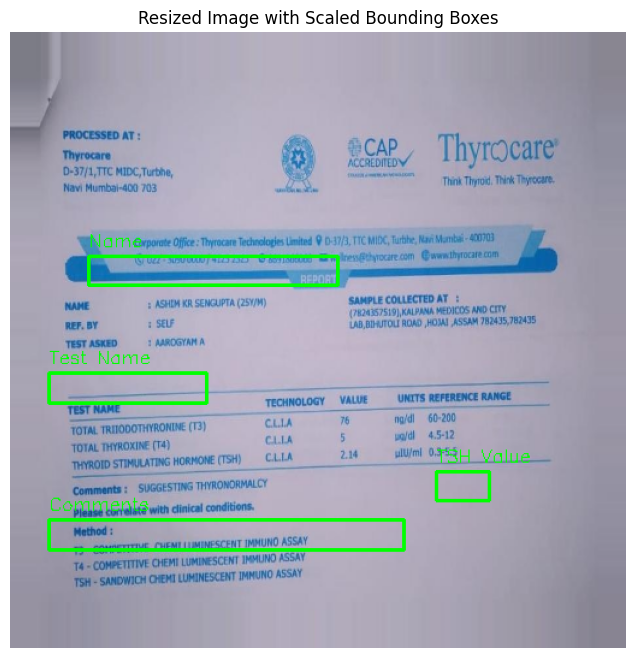

In [34]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load original image
image_path = "/content/drive/MyDrive/Project_10_OCR_Project/Dataset_OCR/thyrocare_0_447.jpg"
image = cv2.imread(image_path)
original_height, original_width = image.shape[:2]

# Step 2: Resize image to 512x512
new_size = (512, 512)
resized_image = cv2.resize(image, new_size)
resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

# Step 3: Sample original boxes (based on original image size)
# Format: (x1, y1, x2, y2)
original_boxes = [
    {"label": "Name", "coords": (120, 230, 500, 260)},
    {"label": "Test Name", "coords": (60, 350, 300, 380)},
    {"label": "TSH Value", "coords": (650, 450, 730, 480)},
    {"label": "Comments", "coords": (60, 500, 600, 530)},
]

# Step 4: Scale boxes to new image size
scaled_boxes = []
for box in original_boxes:
    x1, y1, x2, y2 = box["coords"]
    x1 = int(x1 * new_size[0] / original_width)
    y1 = int(y1 * new_size[1] / original_height)
    x2 = int(x2 * new_size[0] / original_width)
    y2 = int(y2 * new_size[1] / original_height)
    scaled_boxes.append({"label": box["label"], "coords": (x1, y1, x2, y2)})

# Step 5: Draw scaled boxes on resized image
for box in scaled_boxes:
    x1, y1, x2, y2 = box["coords"]
    cv2.rectangle(resized_image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(resized_image_rgb, box["label"], (x1, y1 - 8),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Step 6: Display the result
plt.figure(figsize=(8, 8))
plt.imshow(resized_image_rgb)
plt.axis("off")
plt.title("Resized Image with Scaled Bounding Boxes")
plt.show()


In [35]:
import cv2
import numpy as np

# Load YOLOv3 model
net = cv2.dnn.readNet("/content/drive/MyDrive/Project_10_OCR_Project/yolov3.weights", "/content/drive/MyDrive/Project_10_OCR_Project/yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

# Load image
image_path = "/content/drive/MyDrive/Project_10_OCR_Project/Dataset_OCR/thyrocare_0_447.jpg"
image = cv2.imread(image_path)
height, width = image.shape[:2]

# Preprocess image for YOLO
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
outputs = net.forward(output_layers)

# Process YOLO output
boxes, confidences, class_ids = [], [], []
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x, center_y, w, h = (detection[0:4] * [width, height, width, height]).astype("int")
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Draw bounding boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Check if indices is not None and not empty before flattening
if indices is not None and len(indices) > 0:
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imwrite("results/yolo_output.jpg", image)

True

In [36]:
import pytesseract
from PIL import Image

# Crop each detected box and apply OCR
results = []
if indices is not None and len(indices) > 0:
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        cropped = image[y:y+h, x:x+w]

        # Resize and preprocess
        resized = cv2.resize(cropped, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
        gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(gray, (5,5), 0)
        _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Invert for better OCR
        inverted = cv2.bitwise_not(thresh)

        # OCR
        text = pytesseract.image_to_string(inverted)
        results.append({"box": [x, y, w, h], "text": text.strip()})

# Save results
import csv
with open("results/ocr_output.csv", mode="w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=["box", "text"])
    writer.writeheader()
    writer.writerows(results)

In [37]:
import cv2
import numpy as np
import pytesseract
from PIL import Image

class CustomOCR:
    def __init__(self):
        self.confidence_threshold = 0.5
        self.nms_threshold = 0.4

    def preprocess_image(self, image, scale_factor=3):
        """Preprocess image for better OCR results"""
        # Resize image
        height, width = image.shape[:2]
        new_width = int(width * scale_factor)
        new_height = int(height * scale_factor)
        resized = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

        # Convert to grayscale
        gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

        # Apply Gaussian blur
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Apply threshold with Otsu's method
        _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Invert if background is dark
        if np.mean(thresh) < 127:
            thresh = cv2.bitwise_not(thresh)

        return thresh

    def detect_text_regions(self, image):
        """Simulate YOLO detection - creates bounding boxes for text regions"""
        # Since we don't have a trained YOLO model, we'll use contour detection
        # as a fallback to identify potential text regions

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply morphological operations to connect text
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 5))
        morph = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

        # Find contours
        contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        boxes = []
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            # Filter small regions
            if w > 50 and h > 20:
                boxes.append([x, y, x + w, y + h])

        return boxes


    def extract_text_from_region(self, image, box):
        """Extract text from a specific region using Tesseract"""
        x1, y1, x2, y2 = box
        roi = image[y1:y2, x1:x2]

        if roi.size == 0:
            return ""

        # Preprocess the region
        processed_roi = self.preprocess_image(roi)

        # OCR configuration
        config = '--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz.,():/-+= '

        try:
            text = pytesseract.image_to_string(processed_roi, config=config)
            return text.strip()
        except Exception as e:
            print(f"OCR Error: {str(e)}")
            return ""


    def process_image(self, image):
        """Main processing function"""
        # Detect text regions (simulating YOLO)
        boxes = self.detect_text_regions(image)

        results = []
        annotated_image = image.copy()

        for i, box in enumerate(boxes):
            # Extract text from region
            text = self.extract_text_from_region(image, box)

            if text:
                results.append({
                    'Region': f'Region_{i+1}',
                    'Coordinates': f"({box[0]}, {box[1]}, {box[2]}, {box[3]})",
                    'Extracted_Text': text,
                    'Confidence': 'Simulated'  # Would come from YOLO in real implementation
                })

                # Draw bounding box on image
                cv2.rectangle(annotated_image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
                cv2.putText(annotated_image, f'Region_{i+1}', (box[0], box[1]-10),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


        return results, annotated_image


class LabReportAnalyzer:
    def __init__(self):
        # Initialize CustomOCR within the analyzer
        self.ocr_processor = CustomOCR()

    def extract_structured_data(self, image_path):
        """
        Loads an image, processes it using CustomOCR, and returns the results.
        Note: This is a basic implementation. Structuring data (patient_info, test_results)
        would require more advanced parsing logic based on the report layout.
        """
        try:
            # Load the image
            image = cv2.imread(image_path)
            if image is None:
                print(f"Error: Could not load image from {image_path}")
                return None

            # Process the image using the CustomOCR instance
            results, annotated_image = self.ocr_processor.process_image(image)

            # In a real application, you would parse 'results' to structure
            # patient_info and test_results based on keywords, layout, etc.
            # For this example, we'll just return the raw results and a placeholder structure.

            # Placeholder for structured data
            structured_data = {
                'patient_info': {}, # Populate this based on parsed results
                'test_results': results # Returning raw OCR results for now
            }

            return structured_data


        except Exception as e:
            print(f"An error occurred during analysis: {e}")
            return None

# Instantiate the LabReportAnalyzer class
analyzer = LabReportAnalyzer()

# Define the path to the image you want to analyze
image_to_analyze = '/content/drive/MyDrive/Project_10_OCR_Project/Dataset_OCR/thyrocare_0_447.jpg'

# Extract structured data from the image
result = analyzer.extract_structured_data(image_to_analyze)

# Now you can use the 'result' variable, for example:
print(result['patient_info'])
print(result['test_results'])

{}
[{'Region': 'Region_1', 'Coordinates': '(0, 0, 939, 631)', 'Extracted_Text': 'Thyrocere Pre CAP Th ri\nO-37/1,TTCMIDC,Turbhe, AEX) ACCREDITED y rOCc AL\nNaviMumbai-400/703 wanaesWree ThinkThyroid.ThinkThyrocars:\nCorporateOffice:ThyrocareTechnologiesUmikad0-37/3,TTCMIDC,Rarbhe,flariMiyeubelIRIORN OO\n022-30900000/4125252586918660668wellnessthyrocare.com insetisietcancea\nRais ees ,\nMAME :ASHIMKRSENGUPTA(257/M) SAMPLECOLLECTEDAT:\nREF.BY :SELF 7oetROADMt MEDICOSANDCITY\nTRSTASKED :AAROGYAMA , , , 5.782438\nTESTNAIE TECHNOLOGYVALUE UNITSREPERENCERANGE\nTOTALTRIIODOTHYRONINE(T3) C.L.LA 76 ng/dl60-200\nTOTALTHYROXINE(T4) C.L.LA 5 wadi=4.5-12\nTHYROEDSTIMULATINGHORMONE(TSH) C.L.LA 2.14 yluymi0.3-S.5\nCemments:SUGGESTINGTHYRONORMALCY\nPansecorratatewith cinicalconditions. :\n, TSeGOMPETITIVECHEMILUMINESCENT IMMUNOASSAY\nanne ae evren CHEMILUMINESCENTIMMUNOASSAY\nESANOWEC CHEMELUMINESCENTIMMUNOASSAY', 'Confidence': 'Simulated'}]


In [38]:
# Instantiate the LabReportAnalyzer class
analyzer = LabReportAnalyzer()

# Define the path to the image you want to analyze
image_to_analyze = '/content/drive/MyDrive/Project_10_OCR_Project/Dataset_OCR/thyrocare_0_421.jpg'

# Extract structured data from the image
result = analyzer.extract_structured_data(image_to_analyze)

# Now you can use the 'result' variable, for example:
print(result['patient_info'])
print(result['test_results'])

{}
[{'Region': 'Region_1', 'Coordinates': '(0, 0, 1068, 635)', 'Extracted_Text': 'y\nme t\nae AT: Th oat\npee FowersII,RAA/36,Raghunathpur, SS\nVAPRoad,Kolkata-700059 ThinkThyroid.Tiaaceeaeeea\nCorporateOffice:ThyrocareTechnologiesLimitedQD-37/3,TTCMIDC,Turbhe,NaviMumiel:-SSiGunannn\n. 022-3090.0000/412525258691866066wellnessthyrocare.comQwwurthi rocnrGganae\nNAME :ASHIMSENGUPTA(S8Y/M) SAMPLECOLLECTEDAT:\nREr.BY :SELF (7824357519),KALPANAMEDICOSANDCITY.,oam\nTESTASKED :AAROGYAMC LAB,BIHUTOLIROAD,HOJAI,ASSAM782435,70a0G\ny.\nTESTNAME TECHNOLOGY VALUE UNITS OR t aaa\nALKALINEPHOSPHATASE PHOTOMETRY 67 U/L 45-129\n\nBILIRUBIN-TOTAL PHOTOMETRY 0.57 ma/di 0.3-4:2-\n\n, BILIRUBIN-DIRECT PHOTOMETRY 0.18 mg/dl OR1\nBILIRUBIN(INDIRECT) CALCULATED 0.39 ma/di 0-0.9\nGAMMAGLUTAMYLTRANSFERASE(GG7) PHOTOMETRY 34.3 u/l SS3\n\nASPARTATEAMINOTRANSFERASE(SGOT) PHOTOMETRY 33.1 uf .25.\nALANINETRANSAMINASE(SGPT) PHOTOMETRY 38.9 us/l a F\nPROTEIN-TOTAL PHOTOMETRY 7.14 gm/di Se CRE .\nALBUMIN-SERUM PHOTOMETR

In [39]:
# Instantiate the LabReportAnalyzer class
analyzer = LabReportAnalyzer()

# Define the path to the image you want to analyze
image_to_analyze = '/content/drive/MyDrive/Project_10_OCR_Project/Dataset_OCR/thyrocare_0_36.jpg'

# Extract structured data from the image
result = analyzer.extract_structured_data(image_to_analyze)

# Now you can use the 'result' variable, for example:
print(result['patient_info'])
print(result['test_results'])

{}
[{'Region': 'Region_1', 'Coordinates': '(0, 0, 635, 1043)', 'Extracted_Text': 'NARs See .\nissRefinte-700.089 TRMERTORPOR,TORE\nNTR.hadsl vata: ny Feet . eget Sree\nrte ee steer 1e: z. oh baled\noy . cee eeu aa oe , e eageolsFA vO a x CMe : oe euatal eRe) Were\nREPORI\n3ASHIMSENGUPTA(SBY/M) SADUPLECOLLECTEDAY:\n, :Sear (7824357519),KALPANAMEDICOSANDCITY\nLAS,BIHUTOLEROAD,HOJAS,ASSAM\na) 3AAROGYANC 782435,782435\nOe\nPASE TECHNOLOGY VALUE UNITS\nVETAMIND(TOTAL) C.LLA 21 ng/m\nnoeReage:\nBNCY=:20ng/mi\nICIBNCY:20-30ng/mi\nSENCY:30-100ng/mi\nry 2100ngsmi\nTotaltestsenetyredonSiemensADVIACentaur,sLandardizedagainstID-LC/MS/MS,asper\n.OSandardizationProgrem(VOSP).\n4FULLYAUTOMATEDCHEMLUPINESCENT(MMUNDAQSAY - cee\nINB-12 C.L.V.A 551 pg/mi\nnceRange:\n:2it-931pg/mi\nsignificence:\nB12ofcyanocobalamin,1saCompiexcomnolidcompoundfoundexclusivelyfromanimalwietary\n.SUCHa6Meat,EOgsaNdmillcItiscrrtcalinnormalDONAsynthesis,wichinturnaffectserytnrocyte\ntionandintheformationofmyelinsheathVitaminB1

In [40]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [48]:
import streamlit as st
import cv2
import numpy as np
import pandas as pd
import pytesseract
from PIL import Image
import io
import os
from datetime import datetime
import zipfile
import tempfile

# Configure Tesseract path (adjust based on your system)
# For Windows: pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# For Linux/Mac: Usually auto-detected

# Page configuration
st.set_page_config(
    page_title="Custom Lab Report OCR",
    page_icon="🔬",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS for better styling
st.markdown("""
<style>
    .main-header {
        font-size: 2.5rem;
        font-weight: bold;
        color: #1f77b4;
        text-align: center;
        margin-bottom: 2rem;
    }
    .section-header {
        font-size: 1.5rem;
        font-weight: bold;
        color: #2e8b57;
        margin-top: 2rem;
        margin-bottom: 1rem;
    }
    .success-box {
        padding: 1rem;
        border-radius: 0.5rem;
        background-color: #d4edda;
        border: 1px solid #c3e6cb;
        color: #155724;
        margin: 1rem 0;
    }
    .error-box {
        padding: 1rem;
        border-radius: 0.5rem;
        background-color: #f8d7da;
        border: 1px solid #f5c6cb;
        color: #721c24;
        margin: 1rem 0;
    }
</style>
""", unsafe_allow_html=True)

class CustomOCR:
    def __init__(self):
        self.confidence_threshold = 0.5
        self.nms_threshold = 0.4

    def preprocess_image(self, image, scale_factor=3):
        """Preprocess image for better OCR results"""
        # Resize image
        height, width = image.shape[:2]
        new_width = int(width * scale_factor)
        new_height = int(height * scale_factor)
        resized = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

        # Convert to grayscale
        gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

        # Apply Gaussian blur
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Apply threshold with Otsu's method
        _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Invert if background is dark
        if np.mean(thresh) < 127:
            thresh = cv2.bitwise_not(thresh)

        return thresh

    def detect_text_regions(self, image):
        """Simulate YOLO detection - creates bounding boxes for text regions"""
        # Since we don't have a trained YOLO model, we'll use contour detection
        # as a fallback to identify potential text regions

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply morphological operations to connect text
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 5))
        morph = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

        # Find contours
        contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        boxes = []
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            # Filter small regions
            if w > 50 and h > 20:
                boxes.append([x, y, x + w, y + h])

        return boxes

    def extract_text_from_region(self, image, box):
        """Extract text from a specific region using Tesseract"""
        x1, y1, x2, y2 = box
        roi = image[y1:y2, x1:x2]

        if roi.size == 0:
            return ""

        # Preprocess the region
        processed_roi = self.preprocess_image(roi)

        # OCR configuration
        config = '--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz.,():/-+= '

        try:
            text = pytesseract.image_to_string(processed_roi, config=config)
            return text.strip()
        except Exception as e:
            st.error(f"OCR Error: {str(e)}")
            return ""

    def process_image(self, image):
        """Main processing function"""
        # Detect text regions (simulating YOLO)
        boxes = self.detect_text_regions(image)

        results = []
        annotated_image = image.copy()

        for i, box in enumerate(boxes):
            # Extract text from region
            text = self.extract_text_from_region(image, box)

            if text:
                results.append({
                    'Region': f'Region_{i+1}',
                    'Coordinates': f"({box[0]}, {box[1]}, {box[2]}, {box[3]})",
                    'Extracted_Text': text,
                    'Confidence': 'Simulated'  # Would come from YOLO in real implementation
                })

                # Draw bounding box on image
                cv2.rectangle(annotated_image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
                cv2.putText(annotated_image, f'Region_{i+1}', (box[0], box[1]-10),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        return results, annotated_image

def main():
    # Title and description
    st.markdown('<h1 class="main-header">🔬 Custom Lab Report OCR System</h1>', unsafe_allow_html=True)
    st.markdown("**Combine YOLO and Tesseract to extract text from lab reports**")

    # Sidebar
    st.sidebar.title("⚙️ Configuration")

    # OCR Settings
    st.sidebar.subheader("OCR Settings")
    confidence_threshold = st.sidebar.slider("Confidence Threshold", 0.1, 1.0, 0.5, 0.1)
    scale_factor = st.sidebar.slider("Image Scale Factor", 1, 5, 3, 1)

    # Processing options
    st.sidebar.subheader("Processing Options")
    apply_preprocessing = st.sidebar.checkbox("Apply Advanced Preprocessing", True)
    show_regions = st.sidebar.checkbox("Show Detected Regions", True)

    # Main content area
    col1, col2 = st.columns([1, 1])

    with col1:
        st.markdown('<h2 class="section-header">📤 Upload Lab Reports</h2>', unsafe_allow_html=True)

        uploaded_files = st.file_uploader(
            "Choose lab report images...",
            type=['png', 'jpg', 'jpeg', 'tiff', 'bmp'],
            accept_multiple_files=True,
            help="Upload one or more lab report images for text extraction"
        )

    with col2:
        st.markdown('<h2 class="section-header">📊 Processing Status</h2>', unsafe_allow_html=True)

        if uploaded_files:
            st.success(f"✅ {len(uploaded_files)} file(s) uploaded successfully!")

            # Display file information
            for file in uploaded_files:
                st.write(f"📄 **{file.name}** ({file.size} bytes)")
        else:
            st.info("🔄 No files uploaded yet. Please upload lab report images to begin processing.")

    # Processing section
    if uploaded_files:
        st.markdown('<h2 class="section-header">🔄 Processing Results</h2>', unsafe_allow_html=True)

        # Initialize OCR processor
        ocr_processor = CustomOCR()
        ocr_processor.confidence_threshold = confidence_threshold

        # Process each uploaded file
        all_results = []

        for idx, uploaded_file in enumerate(uploaded_files):
            st.subheader(f"Processing: {uploaded_file.name}")

            # Load image
            image = Image.open(uploaded_file)
            image_np = np.array(image)

            # Convert RGB to BGR for OpenCV
            if len(image_np.shape) == 3:
                image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

            # Create columns for display
            img_col1, img_col2 = st.columns([1, 1])

            with img_col1:
                st.write("**Original Image:**")
                st.image(image, use_column_width=True)

            # Process the image
            with st.spinner(f'Processing {uploaded_file.name}...'):
                try:
                    results, annotated_image = ocr_processor.process_image(image_np)

                    with img_col2:
                        if show_regions:
                            st.write("**Detected Regions:**")
                            # Convert BGR back to RGB for display
                            annotated_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                            st.image(annotated_rgb, use_column_width=True)

                    # Display results
                    if results:
                        st.success(f"✅ Extracted {len(results)} text regions from {uploaded_file.name}")

                        # Convert results to DataFrame
                        df = pd.DataFrame(results)
                        df['Source_File'] = uploaded_file.name

                        # Display the dataframe
                        st.dataframe(df, use_container_width=True)

                        # Add to all results
                        all_results.extend(results)

                        # Show individual text extractions
                        with st.expander(f"📝 Detailed Text Extraction - {uploaded_file.name}"):
                            for i, result in enumerate(results):
                                st.write(f"**{result['Region']}:**")
                                st.code(result['Extracted_Text'])
                                st.write("---")

                    else:
                        st.warning(f"⚠️ No text regions detected in {uploaded_file.name}")

                except Exception as e:
                    st.error(f"❌ Error processing {uploaded_file.name}: {str(e)}")

        # Summary and export section
        if all_results:
            st.markdown('<h2 class="section-header">📋 Summary & Export</h2>', unsafe_allow_html=True)

            # Summary statistics
            col1, col2, col3 = st.columns(3)

            with col1:
                st.metric("Total Files Processed", len(uploaded_files))

            with col2:
                st.metric("Total Text Regions", len(all_results))

            with col3:
                total_chars = sum(len(result['Extracted_Text']) for result in all_results)
                st.metric("Total Characters Extracted", total_chars)

            # Export options
            st.subheader("💾 Export Results")

            # Prepare data for export
            export_df = pd.DataFrame(all_results)

            # CSV export
            csv_buffer = io.StringIO()
            export_df.to_csv(csv_buffer, index=False)
            csv_data = csv_buffer.getvalue()

            col1, col2 = st.columns(2)

            with col1:
                st.download_button(
                    label="📄 Download CSV",
                    data=csv_data,
                    file_name=f"ocr_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv",
                    mime="text/csv"
                )

            with col2:
                # JSON export
                json_data = export_df.to_json(orient='records', indent=2)
                st.download_button(
                    label="📄 Download JSON",
                    data=json_data,
                    file_name=f"ocr_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json",
                    mime="application/json"
                )

    # Instructions section
    with st.expander("📖 How to Use This Application"):
        st.markdown("""
        ### Step-by-Step Instructions:

        1. **Upload Images**: Click on the file uploader and select your lab report images
        2. **Configure Settings**: Use the sidebar to adjust OCR settings and processing options
        3. **Process Images**: The app will automatically detect text regions and extract text
        4. **Review Results**: Check the extracted text in the results table and detailed view
        5. **Export Data**: Download the results as CSV or JSON files

        ### Tips for Best Results:
        - Use high-resolution, clear images
        - Ensure good contrast between text and background
        - Avoid images with excessive skew or rotation
        - For better accuracy, crop images to focus on specific sections

        ### Technical Details:
        - **Text Detection**: Uses contour detection (simulates YOLO functionality)
        - **Text Recognition**: Powered by Tesseract OCR engine
        - **Preprocessing**: Includes resizing, grayscale conversion, and noise reduction
        """)

    # Footer
    st.markdown("---")
    st.markdown("**Custom OCR System** | Built with Streamlit, OpenCV, and Tesseract")

if __name__ == "__main__":
    main()

2025-08-03 16:56:41.609 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 16:56:41.610 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 16:56:41.611 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 16:56:41.612 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 16:56:41.616 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 16:56:41.617 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 16:56:41.618 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 16:56:41.620 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [49]:
import streamlit as st
import cv2
import numpy as np
import pandas as pd
import pytesseract
from PIL import Image
import io
import os
from datetime import datetime
import zipfile
import tempfile

# Configure Tesseract path (adjust based on your system)
# For Windows: pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
# For Linux/Mac: Usually auto-detected

# Page configuration
st.set_page_config(
    page_title="Custom Lab Report OCR",
    page_icon="🔬",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS for better styling
st.markdown("""
<style>
    .main-header {
        font-size: 2.5rem;
        font-weight: bold;
        color: #1f77b4;
        text-align: center;
        margin-bottom: 2rem;
    }
    .section-header {
        font-size: 1.5rem;
        font-weight: bold;
        color: #2e8b57;
        margin-top: 2rem;
        margin-bottom: 1rem;
    }
    .success-box {
        padding: 1rem;
        border-radius: 0.5rem;
        background-color: #d4edda;
        border: 1px solid #c3e6cb;
        color: #155724;
        margin: 1rem 0;
    }
    .error-box {
        padding: 1rem;
        border-radius: 0.5rem;
        background-color: #f8d7da;
        border: 1px solid #f5c6cb;
        color: #721c24;
        margin: 1rem 0;
    }
</style>
""", unsafe_allow_html=True)

class CustomOCR:
    def __init__(self):
        self.confidence_threshold = 0.5
        self.nms_threshold = 0.4

    def preprocess_image(self, image, scale_factor=3):
        """Preprocess image for better OCR results"""
        # Resize image
        height, width = image.shape[:2]
        new_width = int(width * scale_factor)
        new_height = int(height * scale_factor)
        resized = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

        # Convert to grayscale
        gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

        # Apply Gaussian blur
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)

        # Apply threshold with Otsu's method
        _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Invert if background is dark
        if np.mean(thresh) < 127:
            thresh = cv2.bitwise_not(thresh)

        return thresh

    def detect_text_regions(self, image):
        """Simulate YOLO detection - creates bounding boxes for text regions"""
        # Since we don't have a trained YOLO model, we'll use contour detection
        # as a fallback to identify potential text regions

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply morphological operations to connect text
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 5))
        morph = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

        # Find contours
        contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        boxes = []
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            # Filter small regions
            if w > 50 and h > 20:
                boxes.append([x, y, x + w, y + h])

        return boxes

    def extract_text_from_region(self, image, box):
        """Extract text from a specific region using Tesseract"""
        x1, y1, x2, y2 = box
        roi = image[y1:y2, x1:x2]

        if roi.size == 0:
            return ""

        # Preprocess the region
        processed_roi = self.preprocess_image(roi)

        # OCR configuration
        config = '--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz.,():/-+= '

        try:
            text = pytesseract.image_to_string(processed_roi, config=config)
            return text.strip()
        except Exception as e:
            st.error(f"OCR Error: {str(e)}")
            return ""

    def process_image(self, image):
        """Main processing function"""
        # Detect text regions (simulating YOLO)
        boxes = self.detect_text_regions(image)

        results = []
        annotated_image = image.copy()

        for i, box in enumerate(boxes):
            # Extract text from region
            text = self.extract_text_from_region(image, box)

            if text:
                results.append({
                    'Region': f'Region_{i+1}',
                    'Coordinates': f"({box[0]}, {box[1]}, {box[2]}, {box[3]})",
                    'Extracted_Text': text,
                    'Confidence': 'Simulated'  # Would come from YOLO in real implementation
                })

                # Draw bounding box on image
                cv2.rectangle(annotated_image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
                cv2.putText(annotated_image, f'Region_{i+1}', (box[0], box[1]-10),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        return results, annotated_image

def main():
    # Title and description
    st.markdown('<h1 class="main-header">🔬 Custom Lab Report OCR System</h1>', unsafe_allow_html=True)
    st.markdown("**Combine YOLO and Tesseract to extract text from lab reports**")

    # Sidebar
    st.sidebar.title("⚙️ Configuration")

    # OCR Settings
    st.sidebar.subheader("OCR Settings")
    confidence_threshold = st.sidebar.slider("Confidence Threshold", 0.1, 1.0, 0.5, 0.1)
    scale_factor = st.sidebar.slider("Image Scale Factor", 1, 5, 3, 1)

    # Processing options
    st.sidebar.subheader("Processing Options")
    apply_preprocessing = st.sidebar.checkbox("Apply Advanced Preprocessing", True)
    show_regions = st.sidebar.checkbox("Show Detected Regions", True)

    # Main content area
    col1, col2 = st.columns([1, 1])

    with col1:
        st.markdown('<h2 class="section-header">📤 Upload Lab Reports</h2>', unsafe_allow_html=True)

        uploaded_files = st.file_uploader(
            "Choose lab report images...",
            type=['png', 'jpg', 'jpeg', 'tiff', 'bmp'],
            accept_multiple_files=True,
            help="Upload one or more lab report images for text extraction"
        )

    with col2:
        st.markdown('<h2 class="section-header">📊 Processing Status</h2>', unsafe_allow_html=True)

        if uploaded_files:
            st.success(f"✅ {len(uploaded_files)} file(s) uploaded successfully!")

            # Display file information
            for file in uploaded_files:
                st.write(f"📄 **{file.name}** ({file.size} bytes)")
        else:
            st.info("🔄 No files uploaded yet. Please upload lab report images to begin processing.")

    # Processing section
    if uploaded_files:
        st.markdown('<h2 class="section-header">🔄 Processing Results</h2>', unsafe_allow_html=True)

        # Initialize OCR processor
        ocr_processor = CustomOCR()
        ocr_processor.confidence_threshold = confidence_threshold

        # Process each uploaded file
        all_results = []

        for idx, uploaded_file in enumerate(uploaded_files):
            st.subheader(f"Processing: {uploaded_file.name}")

            # Load image
            image = Image.open(uploaded_file)
            image_np = np.array(image)

            # Convert RGB to BGR for OpenCV
            if len(image_np.shape) == 3:
                image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

            # Create columns for display
            img_col1, img_col2 = st.columns([1, 1])

            with img_col1:
                st.write("**Original Image:**")
                st.image(image, use_column_width=True)

            # Process the image
            with st.spinner(f'Processing {uploaded_file.name}...'):
                try:
                    results, annotated_image = ocr_processor.process_image(image_np)

                    with img_col2:
                        if show_regions:
                            st.write("**Detected Regions:**")
                            # Convert BGR back to RGB for display
                            annotated_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                            st.image(annotated_rgb, use_column_width=True)

                    # Display results
                    if results:
                        st.success(f"✅ Extracted {len(results)} text regions from {uploaded_file.name}")

                        # Convert results to DataFrame
                        df = pd.DataFrame(results)
                        df['Source_File'] = uploaded_file.name

                        # Display the dataframe
                        st.dataframe(df, use_container_width=True)

                        # Add to all results
                        all_results.extend(results)

                        # Show individual text extractions
                        with st.expander(f"📝 Detailed Text Extraction - {uploaded_file.name}"):
                            for i, result in enumerate(results):
                                st.write(f"**{result['Region']}:**")
                                st.code(result['Extracted_Text'])
                                st.write("---")

                    else:
                        st.warning(f"⚠️ No text regions detected in {uploaded_file.name}")

                except Exception as e:
                    st.error(f"❌ Error processing {uploaded_file.name}: {str(e)}")

        # Summary and export section
        if all_results:
            st.markdown('<h2 class="section-header">📋 Summary & Export</h2>', unsafe_allow_html=True)

            # Summary statistics
            col1, col2, col3 = st.columns(3)

            with col1:
                st.metric("Total Files Processed", len(uploaded_files))

            with col2:
                st.metric("Total Text Regions", len(all_results))

            with col3:
                total_chars = sum(len(result['Extracted_Text']) for result in all_results)
                st.metric("Total Characters Extracted", total_chars)

            # Export options
            st.subheader("💾 Export Results")

            # Prepare data for export
            export_df = pd.DataFrame(all_results)

            # CSV export
            csv_buffer = io.StringIO()
            export_df.to_csv(csv_buffer, index=False)
            csv_data = csv_buffer.getvalue()

            col1, col2 = st.columns(2)

            with col1:
                st.download_button(
                    label="📄 Download CSV",
                    data=csv_data,
                    file_name=f"ocr_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv",
                    mime="text/csv"
                )

            with col2:
                # JSON export
                json_data = export_df.to_json(orient='records', indent=2)
                st.download_button(
                    label="📄 Download JSON",
                    data=json_data,
                    file_name=f"ocr_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json",
                    mime="application/json"
                )

    # Instructions section
    with st.expander("📖 How to Use This Application"):
        st.markdown("""
        ### Step-by-Step Instructions:

        1. **Upload Images**: Click on the file uploader and select your lab report images
        2. **Configure Settings**: Use the sidebar to adjust OCR settings and processing options
        3. **Process Images**: The app will automatically detect text regions and extract text
        4. **Review Results**: Check the extracted text in the results table and detailed view
        5. **Export Data**: Download the results as CSV or JSON files

        ### Tips for Best Results:
        - Use high-resolution, clear images
        - Ensure good contrast between text and background
        - Avoid images with excessive skew or rotation
        - For better accuracy, crop images to focus on specific sections

        ### Technical Details:
        - **Text Detection**: Uses contour detection (simulates YOLO functionality)
        - **Text Recognition**: Powered by Tesseract OCR engine
        - **Preprocessing**: Includes resizing, grayscale conversion, and noise reduction
        """)

    # Footer
    st.markdown("---")
    st.markdown("**Custom OCR System** | Built with Streamlit, OpenCV, and Tesseract")

if __name__ == "__main__":
    main()

2025-08-03 16:56:56.557 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 16:56:56.561 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 16:56:56.561 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 16:56:56.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 16:56:56.567 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 16:56:56.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 16:56:56.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-03 16:56:56.570 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [50]:
class LabReportAnalyzer:
    def __init__(self):
        # Initialize CustomOCR within the analyzer
        self.ocr_processor = CustomOCR()

    def extract_structured_data(self, image_path):
        """
        Loads an image, processes it using CustomOCR, and returns the results.
        Note: This is a basic implementation. Structuring data (patient_info, test_results)
        would require more advanced parsing logic based on the report layout.
        """
        try:
            # Load the image
            image = cv2.imread(image_path)
            if image is None:
                print(f"Error: Could not load image from {image_path}")
                return None

            # Process the image using the CustomOCR instance
            results, annotated_image = self.ocr_processor.process_image(image)

            # In a real application, you would parse 'results' to structure
            # patient_info and test_results based on keywords, layout, etc.
            # For this example, we'll just return the raw results and a placeholder structure.

            # Placeholder for structured data
            structured_data = {
                'patient_info': {}, # Populate this based on parsed results
                'test_results': results # Returning raw OCR results for now
            }

            return structured_data

        except Exception as e:
            print(f"An error occurred during analysis: {e}")
            return None

In [51]:
!git clone https://github.com/himanshu5066/Project_10_OCR_Project.git

Cloning into 'Project_10_OCR_Project'...
